In [9]:
import pymysql
import pandas as pd
from time import time
import numpy as np
import matplotlib.pyplot as plt

conn = pymysql.connect(host='localhost', user='root', password='root',
                       db='lego1', #charset='utf8mb4',
                       cursorclass=pymysql.cursors.DictCursor)
cursor = conn.cursor()

### Funções de comparação

In [10]:
# Mede a média dos tempos de execução
def crono(cmd, conn, niter=1000):
    total = []
    for i in range(niter):    
        inicio = time()
        df = pd.read_sql_query(cmd, conn)
        total.append(time() - inicio)
    return total

# Compara dois tempos de execução
def cmp(t1, t2):
    t1, t2 = np.mean(t1), np.mean(t2)
    print()
    if t1 < t2:
        print("t1 foi, em média, {}% mais rápido do que t2".format(round((1 - t1/t2)*100, 2)))
    else:
        print("t2 foi, em média, {}% mais rápido do que t1".format(round((1 - t2/t1)*100, 2)))

# Mostra o histograma dos dois tempos
def hist(t1, t2):
    plt.hist(t1, bins=50, alpha=0.5, label='t1')
    plt.hist(t2, bins=50, alpha=0.5, label='t2')
    plt.legend(loc='upper right')
    plt.title("Comparação dos tempos de consulta")
    plt.show()

## Consulta 1


### 1.1

In [11]:
query1 = """
select sets.name
    from sets
    where sets.year < 2010 and sets.num_parts in
        (select num_parts from sets where num_parts < 100)
"""
df1 = pd.read_sql_query(query1, conn)
df1.head(10)

,name
0,Special Offer
1,Weetabix Promotional Lego Village
2,Town Mini-Figures
3,Castle 2 for 1 Bonus Offer
4,Space Mini-Figures
5,Space Mini-Figures
6,Space Mini-Figures
7,Space Mini-Figures
8,Castle Mini Figures
9,Basic Building Set in Cardboard


### 1.2

In [12]:
query2 = """
select sets.name
    from sets
    where sets.year < 2010  and
        ( num_parts < 100)
"""
df2 = pd.read_sql_query(query2, conn)
df2.head(10)

,name
0,Special Offer
1,Weetabix Promotional Lego Village
2,Town Mini-Figures
3,Castle 2 for 1 Bonus Offer
4,Space Mini-Figures
5,Space Mini-Figures
6,Space Mini-Figures
7,Space Mini-Figures
8,Castle Mini Figures
9,Basic Building Set in Cardboard


#### Comparação de Performance


t2 foi, em média, 12.79% mais rápido do que t1


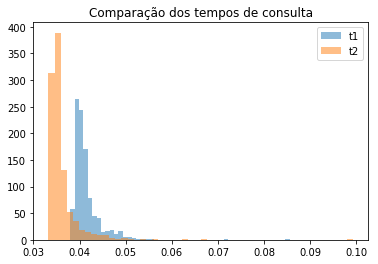

In [13]:
t1 = crono(query1, conn)
t2 = crono(query2, conn)

cmp(t1, t2)
hist(t1, t2)

## Consulta 2

### 2.1

In [14]:
query1 = """
select inventory_id from inventory_parts where
inventory_id in 
(select inventory_id from inventory_parts group by inventory_id having count(inventory_id)=1)
and part_num LIKE 'b%'
"""
df1 = pd.read_sql_query(query1, conn)
df1.head()

,inventory_id
0,9159
1,12365
2,10266
3,11641
4,15225


### 2.2

In [15]:
query2 = """
select inventory_id from inventory_parts where
inventory_id in 
(select inventory_id from inventory_parts group by inventory_id having count(inventory_id)=1)
and part_num in (select part_num from inventory_parts where part_num  LIKE 'b%')
"""
df2 = pd.read_sql_query(query2, conn)
df2.head()

,inventory_id
0,9159
1,12365
2,10266
3,11641
4,15225


#### Comparação de Performance


t1 foi, em média, 27.1% mais rápido do que t2


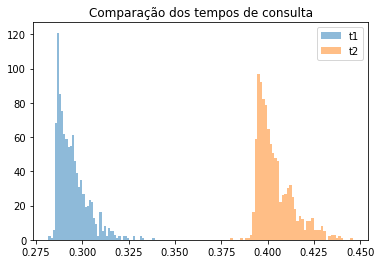

In [16]:
t1 = crono(query1, conn)
t2 = crono(query2, conn)

cmp(t1, t2)
hist(t1, t2)